# 使用Scikit-Learn 完成預測
### Scikit-Learn在三個面向提供支援。
1. 獲取資料:***klearn.datasets***
2. 掌握資料:***sklearn.preprocessing***
3. 機器學習:***sklearn Estimator API***

獲取資料的方式有很多種（包含檔案、資料庫、網路爬蟲、Kaggle Datasets等），<br>
其中最簡單的方式是從Sklearn import 內建的資料庫。由於其特性隨手可得且不用下載，所以我們通常叫他**玩具資料**：

# 基本架構

* 讀取資料&pre-processing
* 切分訓練集與測試集
* 模型配適
* 預測
* 評估(計算成績可能是誤差值或正確率或..)


In [17]:
%matplotlib inline

from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 讀取Iris資料集與資料前處理

Iris Flowers 資料集

我們在這個項目中使用 Iris Data Set，這個資料集中的每個樣本有4個特徵，1個類別。該資料集1中的樣本類別數為3類，每類樣本數目為50個，總共150個樣本。

屬性資訊：

    花萼長度 sepal length(cm)
    花萼寬度 sepal width(cm)
    花瓣長度 petal length(cm)
    花瓣寬度 petal width(cm)
    類別：
        Iris Setosa
        Iris Versicolour
        Iris Virginica

樣本特徵資料是數值型的，而且單位都相同（釐米）。

![Iris Flowers](images/iris_data.PNG)


In [18]:
iris = datasets.load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [19]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

* 印出iris的key值與檔案位置
* 查看前10筆資料
* 查看資料型別
* 印出標註的樣本類別資料

In [20]:
# 印出iris的key值與檔案位置
print(iris.keys())
print(iris['filename'])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
iris.csv


In [21]:
# 查看前10筆資料
print(iris.data[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [22]:
# 查看資料型別
print(type(iris.data))

<class 'numpy.ndarray'>


In [23]:
# 印出標註的樣本類別資料
print(iris.target_names)
print(iris.target)
print(type(iris.target))

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
<class 'numpy.ndarray'>


<方式一>: 先過濾np，再建立DataFrame

In [24]:
# we only take the first two features.

print(iris.feature_names[:2])
X = iris.data[:,:2]  #不是iris.data[:,2]
print(X.shape)

Y = iris.target
print(Y.shape)

# np.concatenate([X, Y[:,np.newaxis]],axis=1)
data_np = np.concatenate([X, Y[:,None]],axis=1)
data_np = pd.DataFrame(data_np, columns=[['sepal length (cm)', 'sepal width (cm)', 'target']])
data_np



    # Numpy中stack()，hstack()，vstack()函数详解原创
# np.stack((X,Y[:,None]), axis=0)
# np.hstack((X, Y[:, np.newaxis]))

['sepal length (cm)', 'sepal width (cm)']
(150, 2)
(150,)


,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0.0
1,4.9,3.0,0.0
2,4.7,3.2,0.0
3,4.6,3.1,0.0
4,5.0,3.6,0.0
...,...,...,...
145,6.7,3.0,2.0
146,6.3,2.5,2.0
147,6.5,3.0,2.0
148,6.2,3.4,2.0


<方式二>: 先建立DataFrame，再過濾

In [25]:
# 先處理data
#以下是組成 pandas DataFrame (也可以不用這種做)
x = pd.DataFrame(iris.data, columns = iris['feature_names'])
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [26]:
# 建立Target欄位與資料(再處理target)
print("target_names: " + str(iris['target_names']) )
y = pd.DataFrame(iris['target'], columns=['target'])
y.head()

target_names: ['setosa' 'versicolor' 'virginica']


,target
0,0
1,0
2,0
3,0
4,0


In [27]:
#合併資料特徵欄位與目標欄位，再取出(過濾)指定的欄位
iris_data = pd.concat([x, y], axis=1)
iris_data = iris_data[['sepal length (cm)', 'petal length (cm)', 'target']]
iris_data.head(10)

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
5,5.4,1.7,0
6,4.6,1.4,0
7,5.0,1.5,0
8,4.4,1.4,0
9,4.9,1.5,0


In [28]:
#只選擇目標為0與1的資料
iris_data = iris_data[iris_data['target'].isin([0,1])]
print(iris_data)
# print(iris_data['data'].size)

# -------原本為篩選的過的data
print(iris['data'].size)
print(iris['data'].size/ len(iris['feature_names']))

    sepal length (cm)  petal length (cm)  target
0                 5.1                1.4       0
1                 4.9                1.4       0
2                 4.7                1.3       0
3                 4.6                1.5       0
4                 5.0                1.4       0
..                ...                ...     ...
95                5.7                4.2       1
96                5.7                4.2       1
97                6.2                4.3       1
98                5.1                3.0       1
99                5.7                4.1       1

[100 rows x 3 columns]
600
150.0


## 切分訓練集與測試集
> train_test_split()

In [29]:
from sklearn.model_selection import train_test_split

iris_data[['sepal length (cm)', 'petal length (cm)', 'target']]

# X_train, X_test, y_train, y_test = train_test_split(iris_data[['sepal length (cm)', 'petal length (cm)']], iris_data['target'], test_size=0.3) #無表頭
X_train, X_test, y_train, y_test = train_test_split(iris_data[['sepal length (cm)', 'petal length (cm)']], iris_data[['target']], test_size=0.3)  #有表頭

In [ ]:
print(X_train.head())
print(X_train.shape)

    sepal length (cm)  petal length (cm)
55                5.7                4.5
78                6.0                4.5
70                5.9                4.8
72                6.3                4.9
69                5.6                3.9
(105, 2)


In [30]:
print(X_test.head())
print(X_test.shape)

    sepal length (cm)  petal length (cm)
37                4.9                1.4
17                5.1                1.4
59                5.2                3.9
56                6.3                4.7
27                5.2                1.5
(30, 2)


In [31]:
print(y_train.head())
print(y_train.shape)

    target
70       1
38       0
32       0
45       0
22       0
(70, 1)


In [32]:
print(y_test.head())
print(type(y_test))

    target
37       0
17       0
59       1
56       1
27       0
<class 'pandas.core.frame.DataFrame'>


# Appendix

>normalization和standardization是差不多的<br>
都是把數據進行前處理，從而使數值都落入到統一的數值範圍，從而在建模過程中，各個特徵量沒差別對待。<br>
* normalization一般是把數據限定在需要的範圍，比如一般都是【0，1】，從而消除了數據量綱對建模的影響。<br>
* standardization 一般是指將數據正態化，使平均值0方差為1.<br>

因此normalization和standardization 是針對數據而言的，消除一些數值差異帶來的特種重要性偏見。<br>
經過歸一化的數據，能加快訓練速度，促進算法的收斂。

### Standardization (z-score)
    to compute the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set.

In [4]:
pip install IPython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.0 MB/s eta 0:00:00


In [10]:
from IPython.display import Math
Math(r'x^{(i)}_{norm}= \frac{x^{(i)}-x_{min}}{x_{max}-x_{min}}')

<IPython.core.display.Math object>

In [13]:
from IPython.display import Math
Math(r'x^{(i)}_{std}= \frac{x^{(i)}-\mu_{x}}{\sigma_{x}}')  # z-score

<IPython.core.display.Math object>

In [33]:
def norm_stats(dfs):
    minimum = np.min(dfs)
    maximum = np.max(dfs)
    mu = np.mean(dfs)
    sigma = np.std(dfs)
    return (minimum, maximum, mu, sigma)


def z_score(col, stats):
    m, M, mu, s = stats
    df = pd.DataFrame()
    for c in col.columns:
        df[c] = (col[c]-mu[c])/s[c]
    return df

In [42]:
stats = norm_stats(X_train)
arr_x_train = np.array(z_score(X_train, stats))
print("Train:")
print(arr_x_train[:10])


statsTest = norm_stats(X_test)
arr_x_test = np.array(z_score(X_test, stats))
print("Test:")
print(arr_x_test[:10])

arr_y_train = np.array(y_train)

Train:
[[ 0.78301208  1.43310953]
 [-1.81056105 -1.03603136]
 [-0.42732205 -0.8949376 ]
 [-1.11894155 -0.96548448]
 [-1.4647513  -1.24767201]
 [ 0.09139258 -1.03603136]
 [-1.11894155 -0.82439072]
 [-0.7731318   0.51600006]
 [ 0.95591695  0.86873447]
 [-0.42732205 -0.96548448]]
Test:
[[-0.94603667 -0.96548448]
 [-0.60022692 -0.96548448]
 [-0.42732205  0.79818759]
 [ 1.47463158  1.36256265]
 [-0.42732205 -0.8949376 ]
 [ 0.95591695  1.64475018]
 [-1.11894155 -0.61275007]
 [-0.94603667  0.37490629]
 [ 1.12882183  1.36256265]
 [-1.63765617 -1.03603136]]


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumer

## use sklearn

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)  #Compute the statistics to be used for later scaling.
print(sc.mean_)  #mean
print(sc.scale_) #standard deviation

[5.44714286 2.76857143]
[0.57835269 1.41749708]


In [50]:
#transform: (x-u)/std.
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print("Train:")
print(X_train_std[:5])      # 如同上面的結果
print("Test:")
print(X_test_std[:5] )

Train:
[[ 0.78301208  1.43310953]
 [-1.81056105 -1.03603136]
 [-0.42732205 -0.8949376 ]
 [-1.11894155 -0.96548448]
 [-1.4647513  -1.24767201]]
Test:
[[-0.94603667 -0.96548448]
 [-0.60022692 -0.96548448]
 [-0.42732205  0.79818759]
 [ 1.47463158  1.36256265]
 [-0.42732205 -0.8949376 ]]


The scaler instance can then be used on new data to transform it the same way it did on the training set:

In [51]:
X_test_std = sc.transform(X_test)
print(X_test_std[:5])

[[-0.94603667 -0.96548448]
 [-0.60022692 -0.96548448]
 [-0.42732205  0.79818759]
 [ 1.47463158  1.36256265]
 [-0.42732205 -0.8949376 ]]




```
# 此內容會顯示為程式碼
```

you can also use fit_transform method (i.e., fit and then transform)  
即用完.fit()接著.transform() ==>.fit_transform()

In [52]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)
print(X_test_std[:10])


[[-0.82717512 -1.13581065]
 [-0.56318306 -1.13581065]
 [-0.43118703  0.557744  ]
 [ 1.0207693   1.09968148]
 [-0.43118703 -1.06806846]
 [ 0.62478121  1.37065022]
 [-0.95917115 -0.79709972]
 [-0.82717512  0.15129088]
 [ 0.75677724  1.09968148]
 [-1.35515924 -1.20355283]]


In [54]:
print('mean of X_train_std:',np.round(X_train_std.mean(),4))
print('std of X_train_std:',X_train_std.std())

mean of X_train_std: 0.0
std of X_train_std: 1.0


## Min-Max Normaliaztion
    Transforms features by scaling each feature to a given range.
    The transformation is given by:

    X' = X - X.min(axis=0) / ((X.max(axis=0) - X.min(axis=0))
    X -> N 維資料
    


49.05714269037828
30.83459184880173


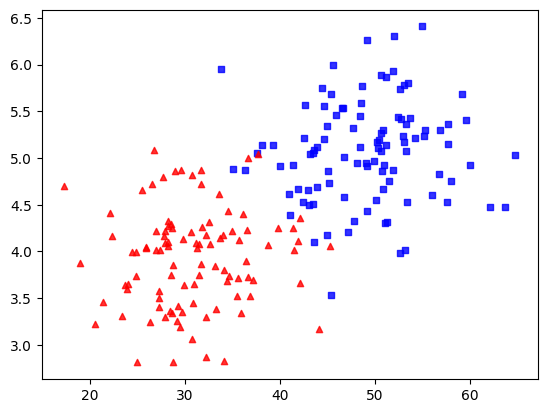

In [71]:
x1 = np.random.normal(50, 6, 100)  # np.random.normal(mu,sigma,size))
y1 = np.random.normal(5, 0.5, 100)

x2 = np.random.normal(30,6,100)
y2 = np.random.normal(4,0.5,100)
plt.scatter(x1,y1,c='b',marker='s',s=20,alpha=0.8)
plt.scatter(x2,y2,c='r', marker='^', s=20, alpha=0.8)

print(np.sum(x1)/len(x1))
print(np.sum(x2)/len(x2))

In [72]:
x_val = np.concatenate((x1,x2))
y_val = np.concatenate((y1,y2))

x_val.shape

(200,)

In [73]:
def minmax_norm(X):
    return (X - X.min(axis=0)) / ((X.max(axis=0) - X.min(axis=0)))

In [74]:
minmax_norm(x_val[:10])

array([0.65536151, 0.44159806, 0.79363814, 0.        , 0.2794983 ,
       0.70564447, 0.62417472, 0.23540704, 1.        , 0.36588507])

In [75]:
from sklearn.preprocessing import MinMaxScaler
print(x_val.shape)
x_val=x_val.reshape(-1, 1)  # 1D->2D
print(x_val.shape)
scaler = MinMaxScaler().fit(x_val)  # default range 0~1
print("scaler.data_min_: ", scaler.data_min_)
print("scaler.data_max_: ", scaler.data_max_)
print(scaler.transform(x_val)[:10])

(200,)
(200, 1)
scaler.data_min_:  [17.34594522]
scaler.data_max_:  [64.73459346]
[[0.72813344]
 [0.62119687]
 [0.79730723]
 [0.40028453]
 [0.54010539]
 [0.75328782]
 [0.71253204]
 [0.51804845]
 [0.90054111]
 [0.58332095]]
